# CALCULATING THE FRACTION OF CHIME FRBS WITH DESI FOOTPRINT
With the chime outriggers coming online, the number of localized Chime FRBs is expected to be in the 100s in 2024.
This analysis gives the expected fraction of FRB host that will have a DESI spectra

The analysis assumes the following relation:
 ### $$S = D_r \int^{\infty}_{0}f(m_r)\xi(m_r) dm_r$$

Where 

$D_r$ is the fraction of FRBs whose general position in the sky (RA,Dec) fall in the DESI footprint

$m_r$ is the apparent brightness of the FRB hosts

$f(m_r)$ is the expected fraction of FRB hosts with apparent magnitude $m_r$

$\xi (m_r)$ is the completeness of the DESI survey and target selection

The values are calculated from a different module


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
D_r = 0.59

#for m_r<19.5, completeness, e(m) = 80%,f(m) = 26% 
eta_1 = D_r * 0.8 * 0.23

#for 19.5<m_r < 20.175, completeness, e(m) = 60%,f(m) = 14% 
eta_2 = D_r * 0.6 * 0.14


#for 20 < m_r <20.5, completeness, e(m) = 70% of 70%,f(m) = 16% 
eta_3 = D_r * 0.7 *0.7 * 0.16

#for m_r>20.5, completeness, e(m) = 70% of 70%,f(m) = 16% 
eta_4 = 0


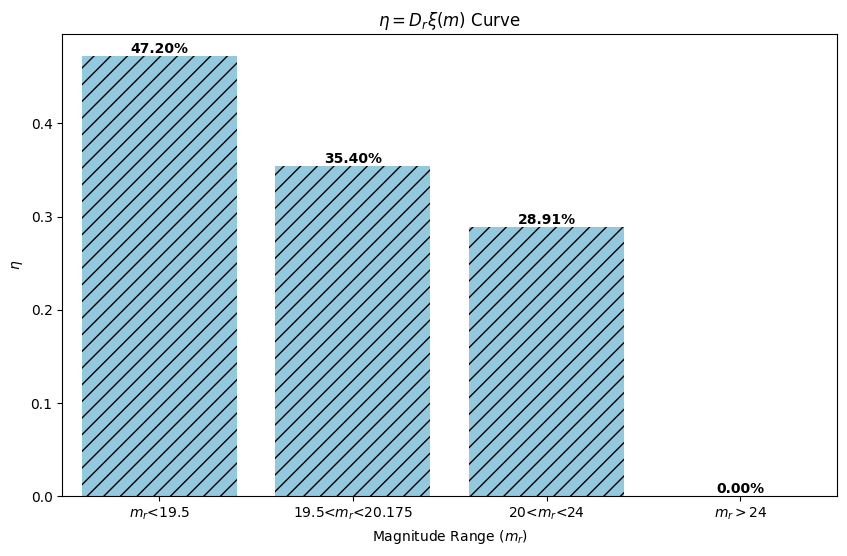

In [3]:


D_r = 0.59

#Calculating fraction using results from other code

#for m_r<19.5, completeness, e(m) = 80%
eta_1 = D_r * 0.8 

#for 19.5<m_r < 20.175, completeness, e(m) = 60%
eta_2 = D_r * 0.6


#for 20 < m_r <20.5, completeness, e(m) = 70% of 70%
eta_3 = D_r * 0.7 *0.7

#for m_r>20.5 
eta_4 = 0

# Categories
categories = ['$m_r$<19.5', '19.5<$m_r$<20.175', '20<$m_r$<24', '$m_r>24$']

# Values of eta for each category
values = [eta_1, eta_2, eta_3, eta_4]

# Plotting the bar chart using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=categories, y=values, color='skyblue', hatch='//')

# Adding diagonal lines to the bars
for bar, value in zip(barplot.patches, values):
    bar.set_hatch('//')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{100*value:.2f}%',
             ha='center', va='bottom', fontweight='bold')

# Adding labels and titles
plt.xlabel('Magnitude Range ($m_r$)')
plt.ylabel('$\eta$')
plt.title(r'$\eta = D_r \xi (m) $ Curve ')
#plt.grid(True, axis='y')


# Display the plot
plt.show()


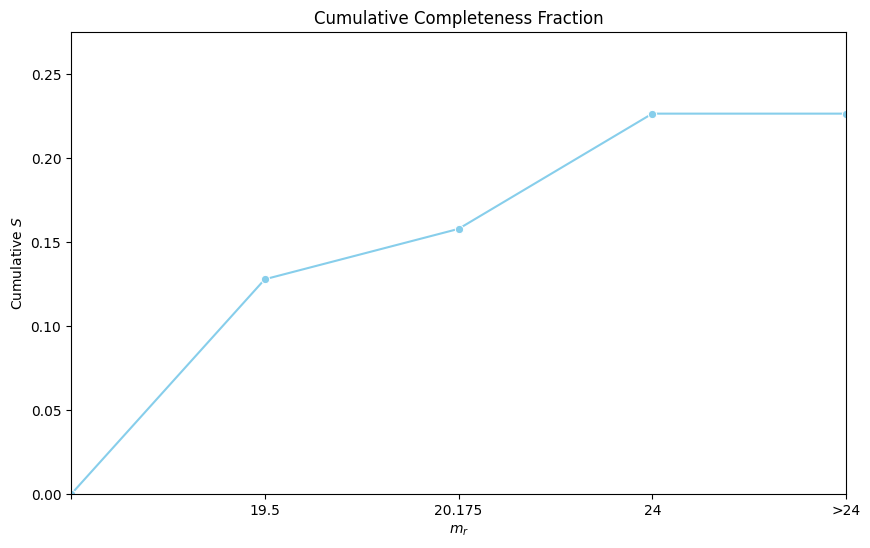

In [4]:
# Categories
categories = ['','19.5', '20.175', '24', '>24']

#Calculating fraction using results from other code

#for m_r<19.5, completeness, e(m) = 80%,f(m) = 16%
eta_1 = 0.8 * 0.16

#for 19.5<m_r < 20.175, completeness, e(m) = 60%,f(m) = 5%
eta_2 = 0.6 * 0.05


#for 20 < m_r <24, completeness, e(m) = 70% of 70%,f(m) = 14%
eta_3 = 0.7 *0.7 * 0.14

#for m_r>20.5, completeness, e(m) = 70% of 70%,f(m) = 65%
eta_4 = 0

# Values of eta for each category
values = [0,eta_1, eta_2, eta_3, eta_4]

# Calculate cumulative values for eta
cumulative_values = np.cumsum(values)

# Plotting the cumulative plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=categories, y=cumulative_values, marker='o', color='skyblue')

# Adding labels and titles
plt.xlabel('$m_r$')
plt.ylabel('Cumulative $S$')
plt.title('Cumulative Completeness Fraction')
plt.ylim(0,0.275)
plt.xlim(0,4)

"""# Adding the values of eta on the plot points
for x, y in zip(categories, cumulative_values):
    plt.text(x, y, f'{100*y:.1f}%', ha='center', va='bottom', fontweight='bold')
    """


# Display the plot
plt.show()
